<a href="https://colab.research.google.com/github/RManisha27/Amazon-Music-Clustering/blob/main/Amazon_Music_Clustering_Guide.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score, davies_bouldin_score

# Load the dataset (Ensure single_genre_artists.csv is uploaded to Colab)
df = pd.read_csv('single_genre_artists.csv')
print(df.info()) # View datatypes and shape [cite: 19]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95837 entries, 0 to 95836
Data columns (total 23 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id_songs            95837 non-null  object 
 1   name_song           95837 non-null  object 
 2   popularity_songs    95837 non-null  int64  
 3   duration_ms         95837 non-null  int64  
 4   explicit            95837 non-null  int64  
 5   id_artists          95837 non-null  object 
 6   release_date        95837 non-null  object 
 7   danceability        95837 non-null  float64
 8   energy              95837 non-null  float64
 9   key                 95837 non-null  int64  
 10  loudness            95837 non-null  float64
 11  mode                95837 non-null  int64  
 12  speechiness         95837 non-null  float64
 13  acousticness        95837 non-null  float64
 14  instrumentalness    95837 non-null  float64
 15  liveness            95837 non-null  float64
 16  vale

In [2]:
# Select only audio features for clustering [cite: 29]
features = ['danceability', 'energy', 'loudness', 'speechiness', 'acousticness',
            'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms']

X = df[features]

# Normalize the data [cite: 25]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

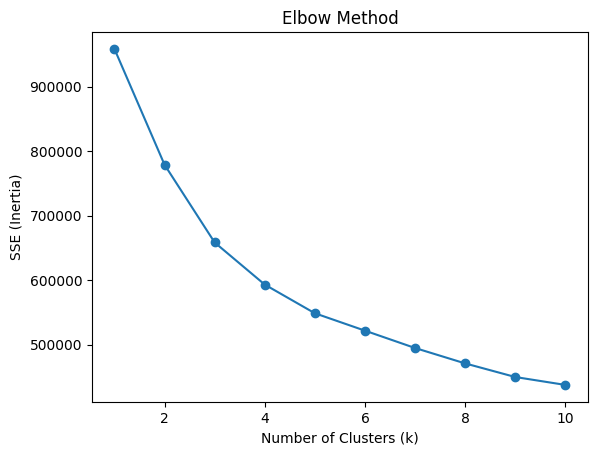

In [3]:
# Elbow Method [cite: 52]
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    sse.append(kmeans.inertia_)

plt.plot(range(1, 11), sse, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('SSE (Inertia)')
plt.title('Elbow Method')
plt.show()

In [4]:
# Applying KMeans (assuming k=5 based on elbow)
optimal_k = 5
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
df['cluster'] = kmeans.fit_predict(X_scaled) # Add labels to original data [cite: 55]
# Evaluation [cite: 65, 66]
print(f"Silhouette Score: {silhouette_score(X_scaled, df['cluster'])}")
print(f"Davies-Bouldin Index: {davies_bouldin_score(X_scaled, df['cluster'])}")

Silhouette Score: 0.1859687698010879
Davies-Bouldin Index: 1.6886165062636274


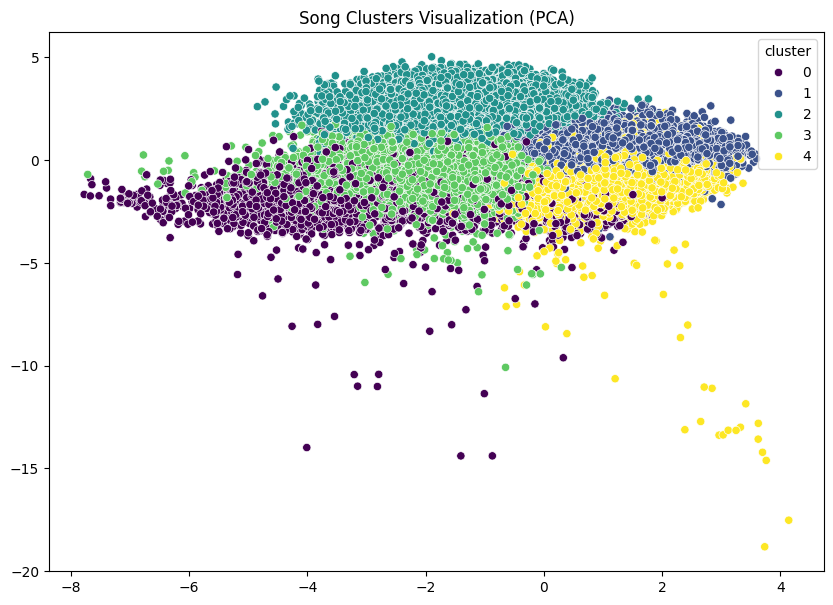

         danceability    energy   loudness  speechiness  acousticness  \
cluster                                                                 
0            0.484393  0.400734 -14.196592     0.059373      0.667338   
1            0.707575  0.670385  -8.007445     0.078193      0.311642   
2            0.664408  0.466415 -13.390332     0.839002      0.586284   
3            0.503249  0.313795 -12.626270     0.062187      0.743109   
4            0.503328  0.713370  -7.055322     0.072827      0.191931   

         instrumentalness  liveness   valence       tempo    duration_ms  
cluster                                                                   
0                0.817011  0.185205  0.449870  113.543365  227713.456836  
1                0.021223  0.170715  0.787126  117.768624  213464.854846  
2                0.000879  0.435679  0.583211  100.167455   96272.014017  
3                0.018369  0.179686  0.418634  111.177219  221195.730223  
4                0.028640  0.246758  0

In [5]:
# Visualize using PCA [cite: 75]
pca = PCA(n_components=2)
components = pca.fit_transform(X_scaled)

plt.figure(figsize=(10, 7))
sns.scatterplot(x=components[:,0], y=components[:,1], hue=df['cluster'], palette='viridis')
plt.title('Song Clusters Visualization (PCA)')
plt.show()

# Interpret Clusters by feature means [cite: 68, 69]
cluster_profiles = df.groupby('cluster')[features].mean()
print(cluster_profiles)

In [6]:
df.to_csv('Amazon_Music_Clustered_Results.csv', index=False)

In [7]:
!pip install streamlit pyngrok -q

In [11]:
from pyngrok import ngrok
import os
# Replace 'YOUR_AUTHTOKEN' with the token from your ngrok dashboard
NGROK_AUTH_TOKEN = "371IRqoqbipmPzmoeJrsebuua3H_25nUEkEq2HdVz6imBSXuJ"
ngrok.set_auth_token(NGROK_AUTH_TOKEN)

In [15]:
%%writefile app.py
import streamlit as st
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import plotly.express as px # Import plotly for interactive plots

st.set_page_config(page_title="Amazon Music Clustering", layout="wide")

st.title("🎵 Amazon Music Clustering Dashboard")
st.markdown("This interactive dashboard uses K-Means clustering to group similar songs based on their audio characteristics.")
st.markdown("--- (Scroll down to explore the analysis) ---")

# Load the dataset directly
try:
    df = pd.read_csv('single_genre_artists.csv')
    Removed: st.success("Dataset 'single_genre_artists.csv' loaded successfully!")
except FileNotFoundError:
    st.error("Error: 'single_genre_artists.csv' not found. Please ensure the file is in the Colab working directory.")
    st.stop()

# 1. Data Overview
st.header("1. Data Overview")
if st.checkbox("Show Raw Data Sample"):
    st.dataframe(df.head())
st.write(f"Dataset contains {df.shape[0]} songs and {df.shape[1]} features.")

# Recommended audio features for clustering
features = ['danceability', 'energy', 'loudness', 'speechiness', 'acousticness',
            'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms']

# Preprocessing
X = df[features]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 2. Clustering Configuration
st.sidebar.header("2. Clustering Settings")
k = st.sidebar.slider("Select Number of Clusters (k)", 2, 10, 5)

kmeans = KMeans(n_clusters=k, random_state=42, n_init='auto')
df['cluster'] = kmeans.fit_predict(X_scaled)

# 3. Elbow Method for Optimal K
st.header("2. Elbow Method: Finding the Optimal K")
st.write("The Elbow Method helps to determine the optimal number of clusters by looking for a 'bend' in the inertia plot.")

sse = []
for k_val in range(1, 11):
    kmeans_elbow = KMeans(n_clusters=k_val, random_state=42, n_init='auto')
    kmeans_elbow.fit(X_scaled)
    sse.append(kmeans_elbow.inertia_)

fig_elbow, ax_elbow = plt.subplots(figsize=(10, 6))
ax_elbow.plot(range(1, 11), sse, marker='o')
ax_elbow.set_xlabel('Number of Clusters (k)')
ax_elbow.set_ylabel('SSE (Sum of Squared Errors)')
ax_elbow.set_title('Elbow Method for K-Means')
ax_elbow.axvline(x=k, color='red', linestyle='--', label=f'Selected K = {k}')
ax_elbow.legend()
st.pyplot(fig_elbow)

# 4. Cluster Visualization (PCA)
st.header("3. Cluster Visualization (PCA)")
st.write("The clusters are visualized in a 2D space using Principal Component Analysis (PCA) for better interpretability.")

pca = PCA(n_components=2)
components = pca.fit_transform(X_scaled)
pca_df = pd.DataFrame(data=components, columns=['PC1', 'PC2'])
pca_df['Cluster'] = df['cluster'].astype(str)

# Using Plotly for interactive PCA visualization
fig_pca = px.scatter(
    pca_df,
    x='PC1',
    y='PC2',
    color='Cluster',
    hover_data={'PC1':False, 'PC2':False, 'Cluster':True},
    title=f'Song Clusters Visualization (PCA) with {k} Clusters',
    labels={'PC1': 'Principal Component 1', 'PC2': 'Principal Component 2'},
    color_discrete_sequence=px.colors.qualitative.Vivid # Using a vibrant color palette
)
# Increased marker size to make clusters 'thicker'
fig_pca.update_traces(marker=dict(size=12, opacity=0.8), selector=dict(mode='markers'))
fig_pca.update_layout(height=600, width=900, hovermode='closest')
st.plotly_chart(fig_pca, use_container_width=True)

# 5. Cluster Characteristics
st.header("4. Cluster Characteristics")
st.write("Average values of audio features for each cluster, providing insight into their unique profiles.")
cluster_profiles = df.groupby('cluster')[features].mean().round(2)
st.dataframe(cluster_profiles)

st.markdown("**Interpretation Tip**: Compare the mean values across clusters for each feature. For example, a cluster with high 'danceability' and 'energy' might represent upbeat tracks.")

# 6. Export Results
st.header("5. Export Clustered Data")
st.write("Download the original dataset with the new cluster assignments.")
csv = df.to_csv(index=False).encode('utf-8')
st.download_button("Download Clustered Data as CSV", data=csv, file_name="clustered_songs.csv", mime="text/csv")

Overwriting app.py


In [12]:
os.system("nohup streamlit run app.py &")
# 2. Open a tunnel on port 8501 (Streamlit's default port)
public_url = ngrok.connect(8501)

print(f"Click the link to open your app: {public_url}")

Click the link to open your app: NgrokTunnel: "https://nonroyal-maura-magisterial.ngrok-free.dev" -> "http://localhost:8501"
